Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Update the paths of the train and test dataset
train_path="gdrive/My Drive/CNN/melanoma_assignment/Train/"
test_path="gdrive/My Drive/CNN/melanoma_assignment/Test/"
data_dir_train = pathlib.Path("gdrive/My Drive/CNN/melanoma_assignment/Train/")
data_dir_test = pathlib.Path("gdrive/My Drive/CNN/melanoma_assignment/Test/")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

#### Data Preparation

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Load train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


#### Validation dataset

In [7]:
## Load validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Code to visualize one instance of all the nine classes present in the dataset

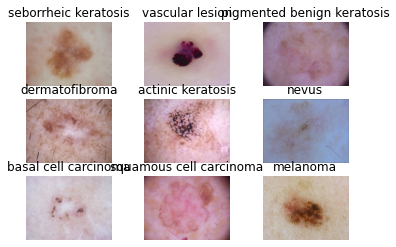

In [9]:
import matplotlib.pyplot as plt

num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Training Model

In [13]:
### Training the model

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 71s 237ms/step - loss: 3.0175 - accuracy: 0.2087 - val_loss: 2.0158 - val_accuracy: 0.2908
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.8729 - accuracy: 0.3270 - val_loss: 1.8087 - val_accuracy: 0.4116
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.7264 - accuracy: 0.4040 - val_loss: 1.6466 - val_accuracy: 0.4631
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6000 - accuracy: 0.4235 - val_loss: 1.5960 - val_accuracy: 0.4698
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.5402 - accuracy: 0.4609 - val_loss: 1.4995 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4224 - accuracy: 0.5117 - val_loss: 1.4878 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4376 - accuracy: 0.4916 - val_loss: 1.5129 - val_accuracy: 0.4966
Epoch 8/20


In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

### Train the model

### Visualizing training results

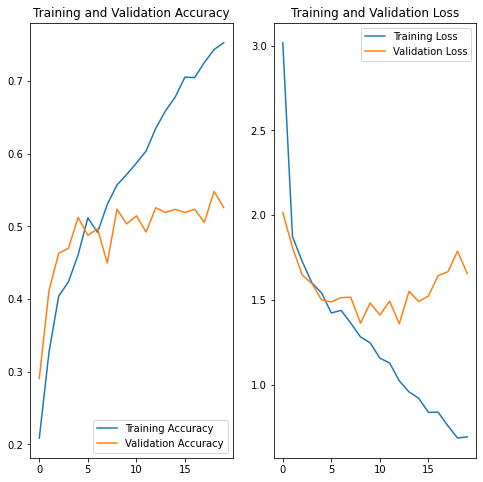

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1. The accuracy of the model for the Training data set is at 78%. But the Validation accuracy 53% is not in par with the training accuracy.

2. The validation loss as observed is very high.
This could also be indicative of some Overfit in the model.

3. We could add some Dropout layers and remove the BatchNormalization layers.
And by adding a few more layers, we could improve the accuracy by trying to extract more features.





### Model1 - compile and train the model


In [16]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 8s 105ms/step - loss: 2.1175 - accuracy: 0.1752 - val_loss: 2.0555 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 5s 95ms/step - loss: 2.0383 - accuracy: 0.1981 - val_loss: 2.0284 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 94ms/step - loss: 2.0328 - accuracy: 0.1948 - val_loss: 2.0264 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 5s 95ms/step - loss: 2.0283 - accuracy: 0.1964 - val_loss: 2.0214 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 5s 95ms/step - loss: 2.0277 - accuracy: 0.2093 - val_loss: 2.0392 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 5s 95ms/step - loss: 2.0308 - accuracy: 0.1931 - val_loss: 2.0270 - val_accuracy: 0.1924
Epoch 7/20
56/56 [==============================] - 5s 93ms/step - loss: 2.0251 - accuracy: 0.1858 - val_loss: 2.0287 - val_accuracy: 0.1924
Epoch 8/20
5

### Visualizing the results

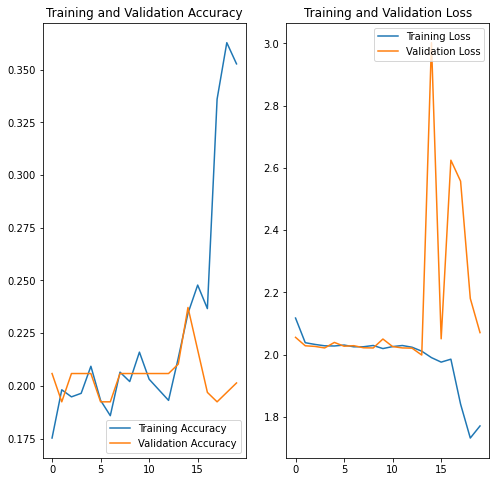

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1. The model accuracy for Train data set has dropped to ~35%.
2. The accuracy for the Validation set is also reduced to ~20%.
3. Seems to be some Overfit with the training accuracy 35% and validation accuracy at 20%.


### Data Augmentation

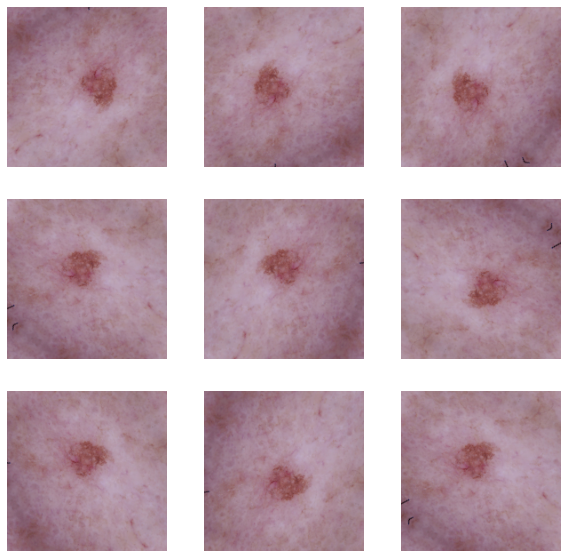

In [18]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

## Visualizing the Augmented Data
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

### Model2 with Augemented 

In [19]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 102ms/step - loss: 2.1443 - accuracy: 0.1819 - val_loss: 2.0625 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 6s 98ms/step - loss: 2.0300 - accuracy: 0.1842 - val_loss: 2.0199 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 97ms/step - loss: 1.9889 - accuracy: 0.2126 - val_loss: 1.8981 - val_accuracy: 0.3647
Epoch 4/20
56/56 [==============================] - 5s 96ms/step - loss: 1.8914 - accuracy: 0.2913 - val_loss: 1.7612 - val_accuracy: 0.3624
Epoch 5/20
56/56 [==============================] - 5s 95ms/step - loss: 1.8655 - accuracy: 0.3008 - val_loss: 1.7332 - val_accuracy: 0.3803
Epoch 6/20
56/56 [==============================] - 5s 95ms/step - loss: 1.7397 - accuracy: 0.3655 - val_loss: 1.6120 - val_accuracy: 0.4027
Epoch 7/20
56/56 [==============================] - 5s 95ms/step - loss: 1.7551 - accuracy: 0.3532 - val_loss: 1.6387 - val_accuracy: 0.4295
Epoch 8/20
5

#### Visualizing the results of Augumented data

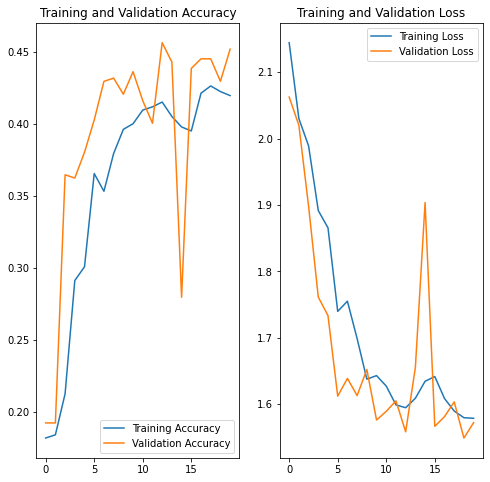

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

1. The model accuracy for Train data set and Validation is not improved, so Data Augmentation has not improved the model performance but overfit is not seen much in the above model.

#### Checking for Class Imbalance

In [21]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


Observations: The samples of various classes are not in equal proportion.

In [22]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
### Use Augumentor

path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE1C60B2550>: 100%|██████████| 500/500 [00:20<00:00, 24.55 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1C6080E50>: 100%|██████████| 500/500 [00:21<00:00, 23.52 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1C64469D0>: 100%|██████████| 500/500 [00:18<00:00, 26.39 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x645 at 0x7FE1C641E090>: 100%|██████████| 500/500 [01:30<00:00,  5.51 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FE1C641E310>: 100%|██████████| 500/500 [01:17<00:00,  6.42 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1C60B2410>: 100%|██████████| 500/500 [00:18<00:00, 26.99 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE1C60B42D0>: 100%|██████████| 500/500 [00:41<00:00, 12.05 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1C60B48D0>: 100%|██████████| 500/500 [00:18<00:00, 27.58 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN/melanoma_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1C60AE450>: 100%|██████████| 500/500 [00:18<00:00, 26.87 Samples/s]


#### **Todo:** Create your model (make sure to include normalization)

In [24]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [25]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


The Augmentor has helped decrease the imbalance in class images and that can be viewed from above.

### Model3 After Decrease of Class imbalance

In [26]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Mode3 Create & Compile, Train

In [29]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
        
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),   
    Dense(9, activation='softmax')
])

model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

epochs = 30

history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 31s 175ms/step - loss: 1.9187 - accuracy: 0.2719 - val_loss: 1.5921 - val_accuracy: 0.4350
Epoch 2/30
169/169 [==============================] - 31s 179ms/step - loss: 1.5290 - accuracy: 0.4143 - val_loss: 1.3445 - val_accuracy: 0.4915
Epoch 3/30
169/169 [==============================] - 30s 175ms/step - loss: 1.3801 - accuracy: 0.4772 - val_loss: 1.2608 - val_accuracy: 0.5397
Epoch 4/30
169/169 [==============================] - 30s 174ms/step - loss: 1.2607 - accuracy: 0.5295 - val_loss: 1.2596 - val_accuracy: 0.5278
Epoch 5/30
169/169 [==============================] - 30s 175ms/step - loss: 1.1274 - accuracy: 0.5827 - val_loss: 1.0538 - val_accuracy: 0.6058
Epoch 6/30
169/169 [==============================] - 31s 175ms/step - loss: 0.9871 - accuracy: 0.6306 - val_loss: 0.9530 - val_accuracy: 0.6333
Epoch 7/30
169/169 [==============================] - 30s 174ms/step - loss: 0.8567 - accuracy: 0.6810 - val_loss: 0.8059 - val_ac

#### **Todo:**  Visualize the model results

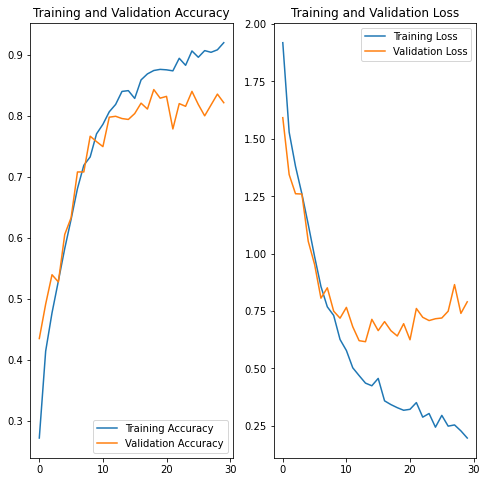

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

1. The training accuracy seems to be nearly ~92%.
2. The validation accuracy is nearly ~82%.
3. Though the model accuracy has improved, the class rebalance has helped treat the overfitting to some extent.
4. Much better models could be built or tried out using more epochs and adding more layers.
5. We can use ResNet50 to build better model.

